Yapılacaklar


In [ ]:
# ilk olarak, verisetimizin oldugu klasoru zip dosyasina cevirecegiz #
# zip dosyasini drive'e yukleyecegiz #
# colab platformuna baglanacagiz #
# google drive'e baglanacagiz #
# kutuphaneleri yukleyecegiz #
# veriestini zipten cikaracagiz kod ile #
# goruntulerin tam konumuna ulasamamiz lazim #
# goruntunun pixellerini goruntutun tam konumundan ulasacagiz#
# goruntuyu bir listeye atacagiz #
# goruntulerin bulundugu listeyi numpy arrary'sine cevirecegiz#
# etiketleri yukleyecegiz #
# verisetini egitim, test ve validasyon olarak ayiracagiz
# siniragi modelimizi olusturacagiz
# siniragini egitecegiz ve agirliklari kaydecegiz


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import zipfile
import os
from tqdm import tqdm
import cv2 as opencv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
from zipfile import ZipFile

In [3]:
import zipfile
from tqdm import tqdm

# Zip dosyasının konumu
zip_dosya_konumu = "/content/drive/MyDrive/TumGoruntuler.zip"
# Çıkartılacak klasör konumu
hedef_klasor = "/content/veriseti"

# Zip dosyasını aç
with zipfile.ZipFile(zip_dosya_konumu, 'r') as zip_ref:
    # İlerleme çubuğu için dosya sayısını al
    dosya_sayısı = len(zip_ref.infolist())

    # tqdm kullanarak ilerleme çubuğunu oluştur
    with tqdm(total=dosya_sayısı, desc="Dosyalar çıkartılıyor") as pbar:
        # Tüm içeriği hedef klasöre çıkart
        for dosya in zip_ref.infolist():
            zip_ref.extract(dosya.filename, hedef_klasor)
            pbar.update(1)

print("Dosya başarıyla çıkartıldı.")


Dosyalar çıkartılıyor: 100%|██████████| 3272/3272 [00:03<00:00, 1072.21it/s]

Dosya başarıyla çıkartıldı.


In [6]:
folder = '/content/veriseti/TumGoruntuler'
files = os.listdir(folder)
print(len(files))

3272


In [7]:
images = []
for file in tqdm(range(len(files))):
    file = str(file)+'.jpg'
    fullpath = os.path.join(folder,file)
    img = opencv.imread(fullpath)
    img = opencv.cvtColor(img,opencv.COLOR_RGB2GRAY) #
    img_normalized = img / 255.0  # Normalize pixel values to range [0, 1]

    images.append(img_normalized)


100%|██████████| 3272/3272 [00:07<00:00, 450.80it/s]


In [ ]:
images = np.asarray(images)

In [ ]:
print(type(images))

<class 'numpy.ndarray'>


In [ ]:
etiketler = pd.read_excel ('/content/drive/MyDrive/Merhaba.xlsx')
etiketler

,Sinif_A,Sinif_B,Sinif_E,Sinif_H,Sinif_M,Sinif_R
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1332,0,0,0,0,0,1
1333,0,0,0,0,0,1
1334,0,0,0,0,0,1
1335,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve validasyon/test setleri olarak ayırma
# X: görüntüler, y: etiketler
X_egitim, X_validasyon_test, y_egitim, y_validasyon_test = train_test_split(images, etiketler, test_size=0.25, random_state=2021)

# Validasyon/test setini validasyon ve test setlerine ayırma
X_validasyon, X_test, y_validasyon, y_test = train_test_split(X_validasyon_test, y_validasyon_test, test_size=0.4, random_state=2021)

# Her bir veri setinin boyutunu kontrol etme
print("Eğitim veri seti boyutu:", X_egitim.shape)
print("Validasyon veri seti boyutu:", X_validasyon.shape)
print("Test veri seti boyutu:", X_test.shape)


Eğitim veri seti boyutu: (1002, 400, 400)
Validasyon veri seti boyutu: (201, 400, 400)
Test veri seti boyutu: (134, 400, 400)


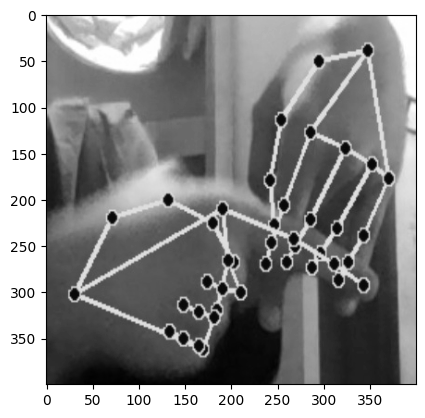

In [ ]:
plt.imshow(X_egitim[4],cmap= 'gray')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import metrics


In [ ]:
num_classes = 6


siniragi  = Sequential([Conv2D(32,(3,3),activation = 'relu', input_shape =(400,400,1)),
                        MaxPooling2D((2,2)),
                        Conv2D(64,(3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Conv2D(128, (3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Dropout(0.2),
                        Flatten(),
                        Dense(128,activation = 'relu'),
                        Dense(29,activation ='softmax')
                        ])


siniragi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.Precision(), metrics.Recall(), 'categorical_accuracy', 'accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Model ağırlıklarını kaydetmek için kontrol noktası oluşturma
checkpoint_path = "/content/drive/MyDrive/Agilirliklar/siniragi_agirliklari_{epoch:02d}.h5"
checkpoint = ModelCheckpoint(checkpoint_path, save_weights_only=True)

# Modeli eğitmek ve kontrol noktası geri çağırımını kullanmak
history = siniragi.fit(
    X_egitim,
    y_egitim,
    epochs=10,
    batch_size=8,
    validation_data=(X_validasyon, y_validasyon),
    callbacks=[checkpoint]
)


Epoch 1/10
126/126 [==============================] - 21s 100ms/step - loss: 0.5479 - precision: 0.9596 - recall: 0.7824 - categorical_accuracy: 0.8533 - accuracy: 0.8533 - val_loss: 0.1148 - val_precision: 0.9851 - val_recall: 0.9851 - val_categorical_accuracy: 0.9851 - val_accuracy: 0.9851
Epoch 2/10
126/126 [==============================] - 10s 82ms/step - loss: 0.0479 - precision: 0.9920 - recall: 0.9900 - categorical_accuracy: 0.9910 - accuracy: 0.9910 - val_loss: 0.0355 - val_precision: 0.9950 - val_recall: 0.9950 - val_categorical_accuracy: 0.9950 - val_accuracy: 0.9950
Epoch 3/10
126/126 [==============================] - 10s 80ms/step - loss: 0.0073 - precision: 0.9970 - recall: 0.9970 - categorical_accuracy: 0.9970 - accuracy: 0.9970 - val_loss: 0.0952 - val_precision: 0.9950 - val_recall: 0.9950 - val_categorical_accuracy: 0.9950 - val_accuracy: 0.9950
Epoch 4/10
126/126 [==============================] - 10s 81ms/step - loss: 0.0097 - precision: 0.9980 - recall: 0.9980 - c

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'precision_1', 'recall_1', 'categorical_accuracy', 'accuracy', 'val_loss', 'val_precision_1', 'val_recall_1', 'val_categorical_accuracy', 'val_accuracy'])


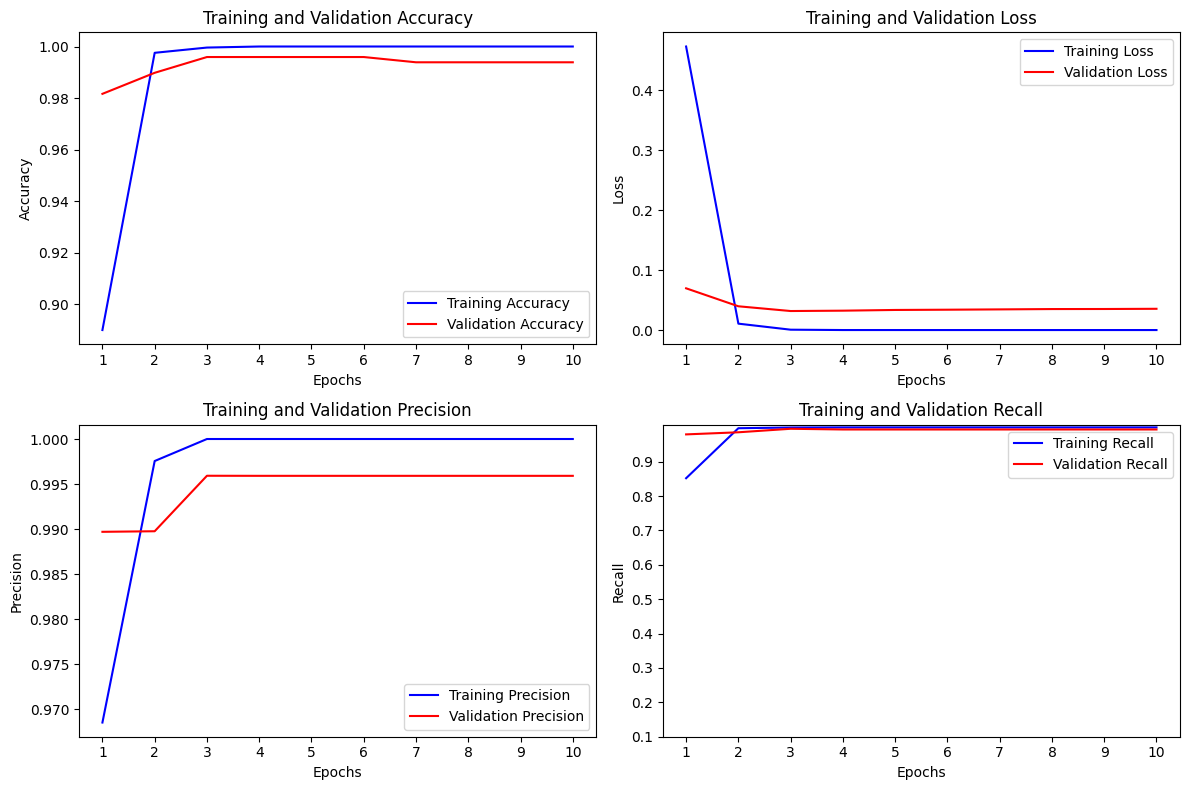

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Get the training and validation metrics
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision_1']
train_recall = history.history['recall_1']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision_1']
val_recall = history.history['val_recall_1']

# Plot the metrics
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Precision plot
plt.subplot(2, 2, 3)
plt.plot(epochs, train_precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Recall plot
plt.subplot(2, 2, 4)
plt.plot(epochs, train_recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly
plt.yticks(np.arange(0.1, 1.0, 0.1))

plt.tight_layout()
plt.show()


In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import metrics

# Load the model architecture
siniragi = Sequential([Conv2D(32,(3,3),activation='relu', input_shape=(400,400,1)),
                       MaxPooling2D((2,2)),
                       Conv2D(64,(3,3),activation='relu'),
                       MaxPooling2D((2,2)),
                       Conv2D(128, (3,3),activation='relu'),
                       MaxPooling2D((2,2)),
                       Flatten(),
                       Dense(128,activation='relu'),
                       Dense(6,activation='softmax')
                       ])

# Compile the model (you can skip this if you are loading an already compiled model)
siniragi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.Precision(), metrics.Recall(), 'categorical_accuracy', 'accuracy'])

# Load the trained weights
siniragi.load_weights('/content/drive/MyDrive/Agilirliklar/siniragi_agirliklari_02.h5')


In [ ]:
from keras.preprocessing import image
import numpy as np

# Define the path to the image
image_path = '/content/WIN_20240515_21_13_51_Pro.jpg'

# Load the image and preprocess it
img = image.load_img(image_path)
img = opencv.imread(image_path) # Load as grayscale and resize to match model input shape
img = opencv.cvtColor(img,opencv.COLOR_RGB2GRAY)

img = opencv.resize(img, (400, 400))
# img_array = image.img_to_array(img)
img_array = np.asarray(img)

img_array = img /255.0  # Normalize pixel values (assuming your model expects normalized inputs)

# Reshape and add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Ensure that the image array has the correct shape
print(f"Image shape: {img_array.shape}")

# Make a prediction using the loaded model
prediction = siniragi.predict(img_array)

# The 'prediction' variable now contains the model's output for the input image
# If your model outputs probabilities (e.g., using softmax activation), you can interpret the results
predicted_class = np.argmax(prediction)  # Get the index of the class with the highest probability


predicted_class_index = np.argmax(prediction)

# Define class labels (you can customize these based on your problem)
class_labels = [
'A','B','E','H','M','R'
]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")
print(f"Predicted class index: {predicted_class}")
# Optionally, you can also print the raw prediction probabilities
print("Raw prediction probabilities:")
print(prediction)


Image shape: (1, 400, 400)
1/1 [==============================] - 0s 23ms/step
Predicted class: B
Predicted class index: 1
Raw prediction probabilities:
[[0.20159557 0.4782236  0.0055274  0.30839163 0.00477411 0.00148778]]


In [ ]:
# Assuming your X_test and y_test are already defined
# Evaluate the model on test data
evaluation = siniragi.evaluate(X_test, y_test)

# Extract the metric names and their corresponding values from the evaluation
metric_names = siniragi.metrics_names
metric_values = evaluation

# Print the metrics
for metric, value in zip(metric_names, metric_values):
    print(f'{metric}: {value}')


11/11 [==============================] - 0s 38ms/step - loss: 0.1364 - precision: 0.9754 - recall: 0.9665 - categorical_accuracy: 0.9665 - accuracy: 0.9665
loss: 0.13643687963485718
precision: 0.9753845930099487
recall: 0.9664633870124817
categorical_accuracy: 0.9664633870124817
accuracy: 0.9664633870124817


In [ ]:
import numpy as np

# Assuming siniragi model and X_test are already loaded and defined

# Select a specific example from X_test (e.g., X_test[55])
# example_index = 78
# example = X_test[example_index]
img = '/content/doddnloadd.png'
example = opencv.imread(img)
example = opencv.cvtColor(example,opencv.COLOR_RGB2GRAY)
example  = np.asarray(example)
# Reshape the example to match the input shape expected by the model
example = np.expand_dims(example, axis=0)  # Add a batch dimension

# Make a prediction using the loaded model
prediction = siniragi.predict(example)

# The 'prediction' variable now contains the model's output for the given example
# If your model outputs probabilities (e.g., using softmax activation), you can interpret the results
predicted_class = np.argmax(prediction)  # Get the index of the class with the highest probability

print(f"Predicted class index: {predicted_class}")
# Optionally, you can also print the raw prediction probabilities
print("Raw prediction probabilities:")
print(prediction)


1/1 [==============================] - 0s 112ms/step
Predicted class index: 13
Raw prediction probabilities:
[[5.3302641e-04 6.1959466e-03 1.5741780e-06 1.2976355e-04 3.0173545e-04
  2.2794820e-05 1.8375113e-05 1.1193616e-02 9.4082907e-06 2.2595774e-03
  2.8961338e-07 4.4775079e-04 3.1986368e-05 8.7707257e-01 4.8513862e-04
  3.1149189e-05 2.4081444e-04 2.8287941e-05 2.7240891e-04 1.7315886e-03
  5.6144260e-03 5.7573987e-05 1.1032277e-05 1.4538399e-06 1.1099846e-02
  7.3142618e-02 3.5963982e-04 8.6548310e-03 5.0717510e-05]]


In [ ]:
X_test[53]


NameError: name 'X_test' is not defined

In [ ]:
predicted_class_index = np.argmax(prediction)

# Define class labels (you can customize these based on your problem)
class_labels = [
    'A', 'B', 'C', 'Ç', 'Ş', 'D', 'E', 'F',
    'G', 'H', 'İ', 'J', 'K', 'L', 'M', 'N', 'O',
    'Ü', 'I', 'O', 'P', 'R', 'S', 'T', 'U',
    'V', 'Y', 'Ğ', 'Z'
]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")

Predicted class: H


In [ ]:
# Load the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 29

siniragi = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Load the saved weights
siniragi.load_weights('/content/drive/MyDrive/Agilirliklar/siniragi_agirliklari_03.h5')

# Now the model `siniragi` is ready to use for prediction or further training


array([[255, 254, 255, ...,   0,   0,   0],
       [253, 255, 252, ...,   0,   0,   0],
       [255, 254, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
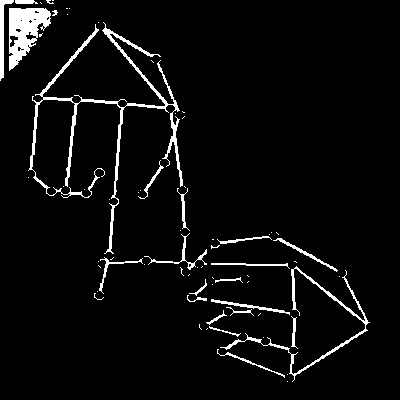

In [ ]:
X_test[64]

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image file
# img_path = X_test[66]

img  = X_test[64]
# img = image.load_img(img_path, target_size=(400, 400), color_mode='grayscale')

# Convert the image to a numpy array and normalize it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


# Use the model to make a prediction
prediction = siniragi.predict(img_array)

# Output the prediction
prediction


1/1 [==============================] - 0s 18ms/step


array([[9.9999952e-01, 2.3766666e-12, 3.1243839e-09, 2.2068338e-11,
        9.6140781e-16, 7.1664029e-11, 2.7304246e-11, 1.5046178e-14,
        1.3844753e-14, 2.3158220e-12, 7.9302648e-10, 1.9547522e-10,
        3.5556214e-18, 5.1115484e-10, 2.0155142e-14, 4.7368364e-12,
        5.5191133e-11, 7.5916617e-13, 6.1704011e-09, 2.4953160e-14,
        4.1803816e-07, 4.7802617e-10, 3.7148260e-11, 1.4394139e-12,
        4.6283697e-12, 4.6490781e-10, 2.1850353e-13, 8.5473338e-12,
        2.8904561e-11]], dtype=float32)

In [ ]:
predicted_class_index = np.argmax(prediction)

# Define class labels (you can customize these based on your problem)
class_labels = [
    'A', 'B', 'C', 'Ç', 'Ş', 'D', 'E', 'F',
    'G', 'H', 'İ', 'J', 'K', 'L', 'M', 'N', 'O',
    'Ü', 'I', 'O', 'P', 'R', 'S', 'T', 'U',
    'V', 'Y', 'Ğ', 'Z'
]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")

Predicted class: A


In [ ]:
print(len(class_labels))

29
